[*********************100%%**********************]  1 of 1 completed


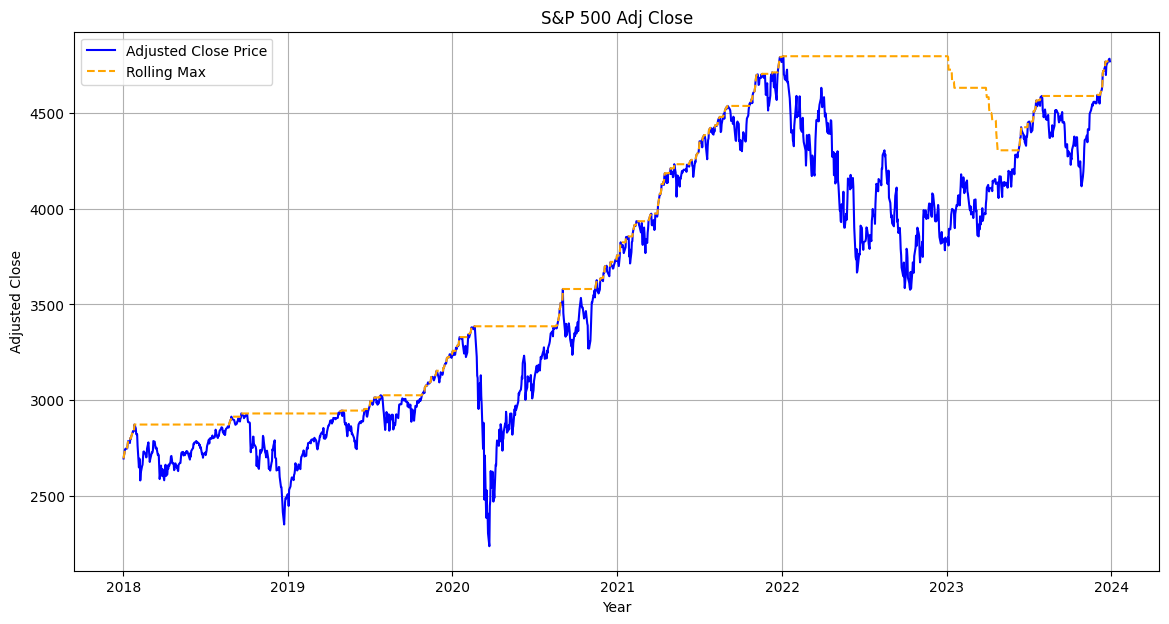

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical data for S&P 500
symbol = '^GSPC'
start_date = '2018-01-01'
end_date = '2024-01-01'

# Download the data
sp500_data = yf.download(symbol, start=start_date, end=end_date)

# Keep only the 'Adj Close' price
adj_close = sp500_data['Adj Close']

# Calculate rolling max
rolling_max = adj_close.rolling(window=252,min_periods=0).max()  # 252 trading days in a year

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(adj_close, label='Adjusted Close Price', color='blue')
plt.plot(rolling_max, label='Rolling Max', color='orange', linestyle='--')
plt.title('S&P 500 Adj Close')
plt.xlabel('Year')
plt.ylabel('Adjusted Close')
plt.legend()
plt.grid()

# Save the plot as a PNG file
plt.savefig('sp500_adj_close.png')
plt.show()

In [22]:
# Calculate drawdown as the difference between adj_close and rolling_max
drawdown = (adj_close - rolling_max) / rolling_max * 100

# Create a DataFrame with the three columns
df = pd.DataFrame({
    'Adj Close': adj_close,
    'Rolling Max': rolling_max,
    'Drawdown (%)': drawdown
})

# Display the first few rows of the DataFrame
df = df.sort_values(by='Drawdown (%)', ascending=True)
df

,Adj Close,Rolling Max,Drawdown (%)
Date,,,
2020-03-23,2237.399902,3386.149902,-33.924960
2020-03-20,2304.919922,3386.149902,-31.930954
2020-03-16,2386.129883,3386.149902,-29.532657
2020-03-18,2398.100098,3386.149902,-29.179151
2020-03-19,2409.389893,3386.149902,-28.845740
...,...,...,...
2021-02-08,3915.590088,3915.590088,0.000000
2021-02-05,3886.830078,3886.830078,0.000000
2021-02-04,3871.739990,3871.739990,0.000000


In [24]:
# Ensure 'Date' is a column in the DataFrame (if it's currently the index)
df = df.reset_index()

# Find the index of the minimum drawdown for each 'Rolling Max'
min_drawdown_indices = df.groupby('Rolling Max')['Drawdown (%)'].idxmin()

# Use the indices to select the corresponding rows from the original DataFrame
min_drawdown_by_rolling_max = df.loc[min_drawdown_indices, ['Date', 'Rolling Max', 'Drawdown (%)']].reset_index(drop=True)

# Display the resulting DataFrame
min_drawdown_by_rolling_max = min_drawdown_by_rolling_max.sort_values(by='Drawdown (%)', ascending=True)
min_drawdown_by_rolling_max.head(15)

,Date,Rolling Max,Drawdown (%)
66,2020-03-23,3386.149902,-33.924960
195,2022-10-12,4796.560059,-25.425097
18,2018-12-24,2930.750000,-19.778210
194,2023-01-04,4793.540039,-19.621617
186,2023-01-05,4726.350098,-19.428311
174,2023-03-13,4631.600098,-16.751016
177,2023-01-17,4662.850098,-14.409216
168,2023-03-30,4602.450195,-11.985358
164,2023-04-04,4582.640137,-10.518828
165,2023-10-27,4588.959961,-10.276617


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


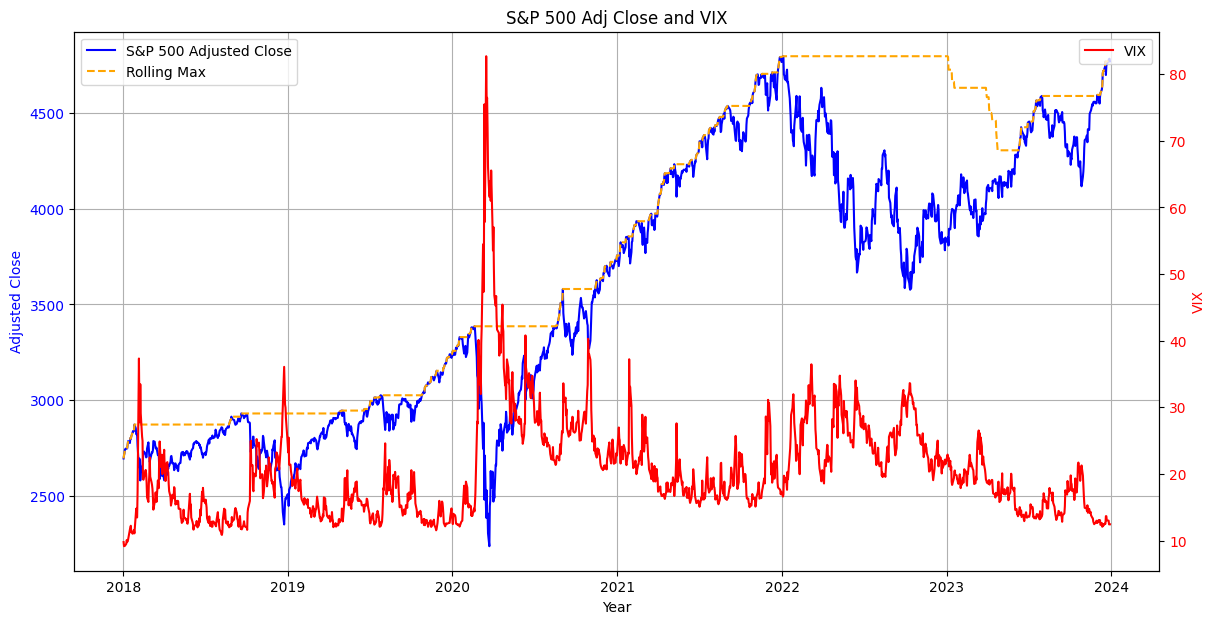

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical data for S&P 500 and VIX
sp500_symbol = '^GSPC'
vix_symbol = '^VIX'
start_date = '2018-01-01'
end_date = '2024-01-01'

# Download the data
sp500_data = yf.download(sp500_symbol, start=start_date, end=end_date)
vix_data = yf.download(vix_symbol, start=start_date, end=end_date)

# Keep only the 'Adj Close' price
adj_close = sp500_data['Adj Close']
vix_close = vix_data['Adj Close']

# Calculate rolling max for S&P 500
rolling_max = adj_close.rolling(window=252, min_periods=0).max()  # 252 trading days in a year

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot S&P 500 Adjusted Close price
ax1.plot(adj_close, label='S&P 500 Adjusted Close', color='blue')
ax1.plot(rolling_max, label='Rolling Max', color='orange', linestyle='--')
ax1.set_title('S&P 500 Adj Close and VIX')
ax1.set_xlabel('Year')
ax1.set_ylabel('Adjusted Close', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.grid()

# Create secondary axis for VIX
ax2 = ax1.twinx()
ax2.plot(vix_close, label='VIX', color='red', linestyle='-')
ax2.set_ylabel('VIX', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Show the legend for the secondary axis
ax2.legend(loc='upper right')

# Save the plot as a PNG file
plt.savefig('sp500_vix_plot.png')
plt.show()
